<ipython-input-1-abe4f6118f43>:97: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e3)
<ipython-input-1-abe4f6118f43>:98: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5e4)


back rate:   914.4865895393369


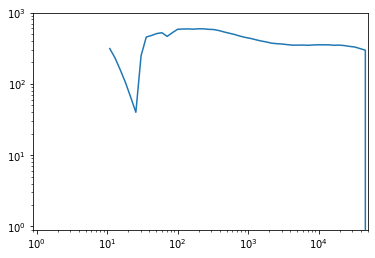

In [1]:
from scipy.integrate import quad
import math
from sympy import symbols, Eq, solve, sqrt
import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt


### This script calculates Sensitivity as it is explained in Martinez-Castellanos ApJ 2022, AMEGO PAPER

##AMEGO SENSITIVITY POINTS

f_AMEO = open('./AMEGO_Sens_points.dat', 'r')
lines=f_AMEO.readlines()

SensAmeo=[]
SensAmeo_energy=[]


for x in lines:
    SensAmeo.append(float(x.split(' ')[1]))
    SensAmeo_energy.append(float(x.split(' ')[0])*1e3)
f_AMEO.close()


##GBM SENSITIVITY POINTS

f_GBM = open('./GBM_Sens.dat', 'r')
lines=f_GBM.readlines()

SensGBM=[]
SensGBM_energy=[]


for x in lines:
    SensGBM.append(float(x.split(' ')[1]))
    SensGBM_energy.append(float(x.split(' ')[0]))
f_GBM.close()


##BATSE SENSITIVITY POINTS

f_BATSE = open('./BATSE_Sens.dat', 'r')
lines=f_BATSE.readlines()

SensBATSE=[]
SensBATSE_energy=[]


for x in lines:
    SensBATSE.append(float(x.split(' ')[1]))
    SensBATSE_energy.append(float(x.split(' ')[0]))
f_BATSE.close()


##SWIFT SENSITIVITY POINTS

f_SWIFT = open('./SWIFT_Sens.dat', 'r')
lines=f_SWIFT.readlines()

SensSWIFT=[]
SensSWIFT_energy=[]


for x in lines:
    SensSWIFT.append(float(x.split(' ')[1]))
    SensSWIFT_energy.append(float(x.split(' ')[0]))
f_SWIFT.close()
##EFFECTIVE AREA

f = open('../EffArea.dat', 'r')
lines=f.readlines()
effA=[]
effA_energy=[]

Emin_sub = 100
Emax_sub = 1000

effA_sub=[]
effA_energy_sub=[]

for x in lines:
    effA.append(float(x.split(' ')[3]))
    effA_energy.append(float(x.split(' ')[0]))
    if(Emin_sub<float(x.split(' ')[0])<Emax_sub):
        effA_sub.append(float(x.split(' ')[3]))
        effA_energy_sub.append(float(x.split(' ')[0]))
f.close()

#Get interpolation funtion for Effective area points 

Aeff_interp = CubicSpline(effA_energy, effA, bc_type='natural')


plt.yscale('log')
plt.xscale('log')
plt.ylim(0, 1e3)
plt.xlim(0, 5e4)

#plt.scatter(effA_energy,effA)
plt.plot(effA_energy,Aeff_interp(effA_energy))



##IMPORT BACKGROUNDS
A_factor_upper=(2*np.pi*14.5**2)*(2*np.pi)
A_factor_lower=(np.pi*14.5**2)*(2*np.pi)

## Albedo
f_back_albedo = open('../bkg_reweight/AlbedoGamma.dat', 'r')
lines_back_albedo=f_back_albedo.readlines()
back_albedo_flux=[]
back_albedo_energy=[]
deltaE_albedo=[]

for x in lines_back_albedo:
    deltaE_albedo.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #print float(x.split(' ')[4]),' ',(float(x.split(' ')[3])-float(x.split(' ')[2]))
#    back_albedo_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_albedo_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_albedo_energy.append(float(x.split(' ')[0]))
#    back_albedo_energy_high.append(float(x.split(' ')[3]))
#    back_albedo_energy_low.append(float(x.split(' ')[2]))

f_back_albedo.close()

#print back_albedo_flux

## Cosmic gamma
f_back_cosmic = open('../bkg_reweight/DiffuseGamma.dat', 'r')
lines_back_cosmic=f_back_cosmic.readlines()
back_cosmic_flux=[]
back_cosmic_energy=[]
deltaE_cosmic=[]

for x in lines_back_cosmic:
    deltaE_cosmic.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_cosmic_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_cosmic_flux.append(float(x.split(' ')[3])*A_factor_upper)
    back_cosmic_energy.append(float(x.split(' ')[0]))
f_back_cosmic.close()

## Primary protons
f_back_protons = open('../bkg_reweight/PrimaryProton.dat', 'r')
lines_back_protons=f_back_protons.readlines()
back_protons_flux=[]
back_protons_energy=[]
deltaE_protons=[]

for x in lines_back_protons:
    deltaE_protons.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_protons_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_protons_flux.append(float(x.split(' ')[3])*A_factor_upper)
    back_protons_energy.append(float(x.split(' ')[0]))
f_back_protons.close()

## Primary protons_sec
f_back_protons_sec = open('../bkg_reweight/SecondaryProton.dat', 'r')
lines_back_protons_sec=f_back_protons_sec.readlines()
back_protons_sec_flux=[]
back_protons_sec_energy=[]
deltaE_protons_sec=[]

for x in lines_back_protons_sec:
    deltaE_protons_sec.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_protons_sec_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_protons_sec_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_protons_sec_energy.append(float(x.split(' ')[0]))
f_back_protons_sec.close()

## Primary neutrons
f_back_neutrons = open('../bkg_reweight/Neutron.dat', 'r')
lines_back_neutrons=f_back_neutrons.readlines()
back_neutrons_flux=[]
back_neutrons_energy=[]
deltaE_neutrons=[]

for x in lines_back_neutrons:
    deltaE_neutrons.append(float(x.split(' ')[2])-float(x.split(' ')[1]))
    #back_neutrons_flux.append(2*np.pi*float(x.split(' ')[4])*(float(x.split(' ')[3])-float(x.split(' ')[2])))
    back_neutrons_flux.append(float(x.split(' ')[3])*A_factor_lower)
    back_neutrons_energy.append(float(x.split(' ')[0]))
f_back_neutrons.close()


## Add up all backgrounds in each energy bin, note that these come in ph keV-1 s-1

back_total_flux=[]
back_total_energy=[]

back_total_energy_sub=[]
back_total_flux_sub=[]

for i in range(np.size(back_cosmic_energy)) :
    back_total_flux.append(back_cosmic_flux[i]+back_albedo_flux[i]+back_protons_flux[i]+back_protons_sec_flux[i]+back_neutrons_flux[i])
    back_total_energy.append(back_cosmic_energy[i])
    if(Emin_sub<back_cosmic_energy[i]<Emax_sub):
        back_total_flux_sub.append(back_cosmic_flux[i]+back_albedo_flux[i]+back_protons_flux[i]+back_protons_sec_flux[i]+back_neutrons_flux[i])
        back_total_energy_sub.append(back_cosmic_energy[i])

## Integrate over energy range to get the RATE

back_rate =np.trapz(back_total_flux_sub,x=back_total_energy_sub)
print("back rate:"," ",back_rate)



In [2]:
#x = symbols('x')
#expr = x*effA_avg*Tobs - 6.5*(x*effA_avg*Tobs+back_rate*Tobs)

#eq1 = Eq(x*effA_avg*Tobs - 6.5*sqrt(x*effA_avg*Tobs+back_rate*Tobs),0)
#eq1 = Eq(x*effA_avg*Tobs/(sqrt(x*effA_avg*Tobs+back_rate*Tobs)),6.5)


#print(0.4595*effA_avg*Tobs - 6.5*math.sqrt(0.4595*effA_avg*Tobs+back_rate*Tobs))

<ipython-input-3-b2147dd599d3>:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fat_int = quad(fat, 10, 10000)


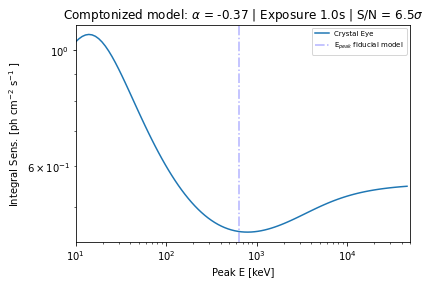

In [3]:
##NOW LET'S DEFINE THE SENSITIVITY VS. PEAK ENERGY FUNCTION

def Sens(Epeak):

    #Define parameters
    Tobs=1
    #First get signal events from S/N eq.
    x = symbols('x')
    eq1 = Eq(x/(sqrt(x+back_rate*Tobs)),6.5)
    sol = solve(eq1)
    Signal_Events = sol[0]
    #print("Number of signal events: ", Signal_Events)
    
    ##Defined COMPTOMNIZED MODEL FOR GRB prefered over Band model

    #A = 1.48e-2 # s-1 cm-2 between 10-1000 keV, not included in the spectral model!
    alpha = -0.37
    #Epeak = 636
    
    #Parameters for BAND MODEL
    #alpha = -1
    #beta  = -2
    #double Epeak = 230;//keV
    #threshold = (alpha-beta)*Epeak/(alpha+2);

    def GRB(x):
         return (x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
        
         #if( x<threshold ):
             #return (( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
         #elif( x>=threshold ):
             #return (( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))
        
        
    #Build function with GRB convolved with A_eff and Tobs

    def fat(x):
        return GRB(x)*Aeff_interp(x)*Tobs


    #Now let's solve integral eq. First calculate integral between 10 keV and 10 MeV

    fat_int = quad(fat, 10, 10000)
    fat_int = fat_int[0]
    #print("Integral of FAT: ",fat_int)
    
    

    eq3 = Eq(x*fat_int,Signal_Events)
    sol3 = solve(eq3)
    Norm_factor = sol3[0]
    
    #print("Norm. Factor is: ",Norm_factor)
    
    
    #Now Integrate GRB function with normalization factor to get the flux value
    A = sol3[0] # s-1 cm-2 between 10-1000 keV
    
    #COMPTONIZED
    #alpha = -0.37
    #Epeak = 636

    
    #Parameters for BAND MODEL
    #alpha = -0.67
    #beta  = -2.5
    #double Epeak = 230;//keV
    
    #threshold = (alpha-beta)*Epeak/(alpha+2);
    def GRB_norm(x):
         return A*(x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
         
         #if( x<threshold ):
         #    return (A*( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
         #elif( x>=threshold ):
         #    return (A*( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))

    GRB_int = quad(GRB_norm, 10, 10000)
    GRB_int = GRB_int[0]
    #print("Mimimum flux: ",GRB_int)
    return(GRB_int)

#Apeak_array = np.linspace(10,1000,100)

#
Sens_BAND_1s=open('CrystalEye_SensBand_10keV_10MeV_1s.dat', 'w')


Apeak_array = np.logspace(np.log10(10), np.log10(5e4), 101,endpoint=False)
Sens_array=[]
for i in range(len(Apeak_array)):
    #print(Apeak_array[i])
    Sens_array.append(Sens(Apeak_array[i]))
    print(Apeak_array[i]," ",Sens(Apeak_array[i]),file=Sens_BAND_1s)

Sens_BAND_1s.close()
#plt.title(r'Band model: $\alpha$ = -1 - $\beta$ = -2 | Exposure 1.0s | S/N = 8$\sigma$')
plt.title(r'Comptonized model: $\alpha$ = -0.37 | Exposure 1.0s | S/N = 6.5$\sigma$')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Peak E [keV]')
plt.ylabel(r'Integral Sens. [ph cm$^{-2}$ s$^{-1}$ ]')    
plt.plot(Apeak_array,Sens_array, label='Crystal Eye')
#plt.plot(SensAmeo_energy,SensAmeo, label='AMEGO')
#plt.plot(SensGBM_energy,SensGBM, label='GBM - Park et.al. 2018')
#plt.plot(SensBATSE_energy,SensBATSE, label='BATSE - Park et.al. 2018')
#plt.plot(SensSWIFT_energy,SensSWIFT, label='SWIFT BAT - Park et.al. 2018')


plt.xlim([10,5e4 ])
#plt.ylim([3e-14,8e-9 ])
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250
plt.axvline(636, color = 'b',linestyle='dashdot',alpha=0.3,label='E$_{peak}$ fiducial model')
plt.legend(loc='upper right', prop={'size': 7})
#plt.show()
plt.savefig('SensVSpeakE.png')

(2.6650814061332433, 38.8841610303419)
6.521664219258271


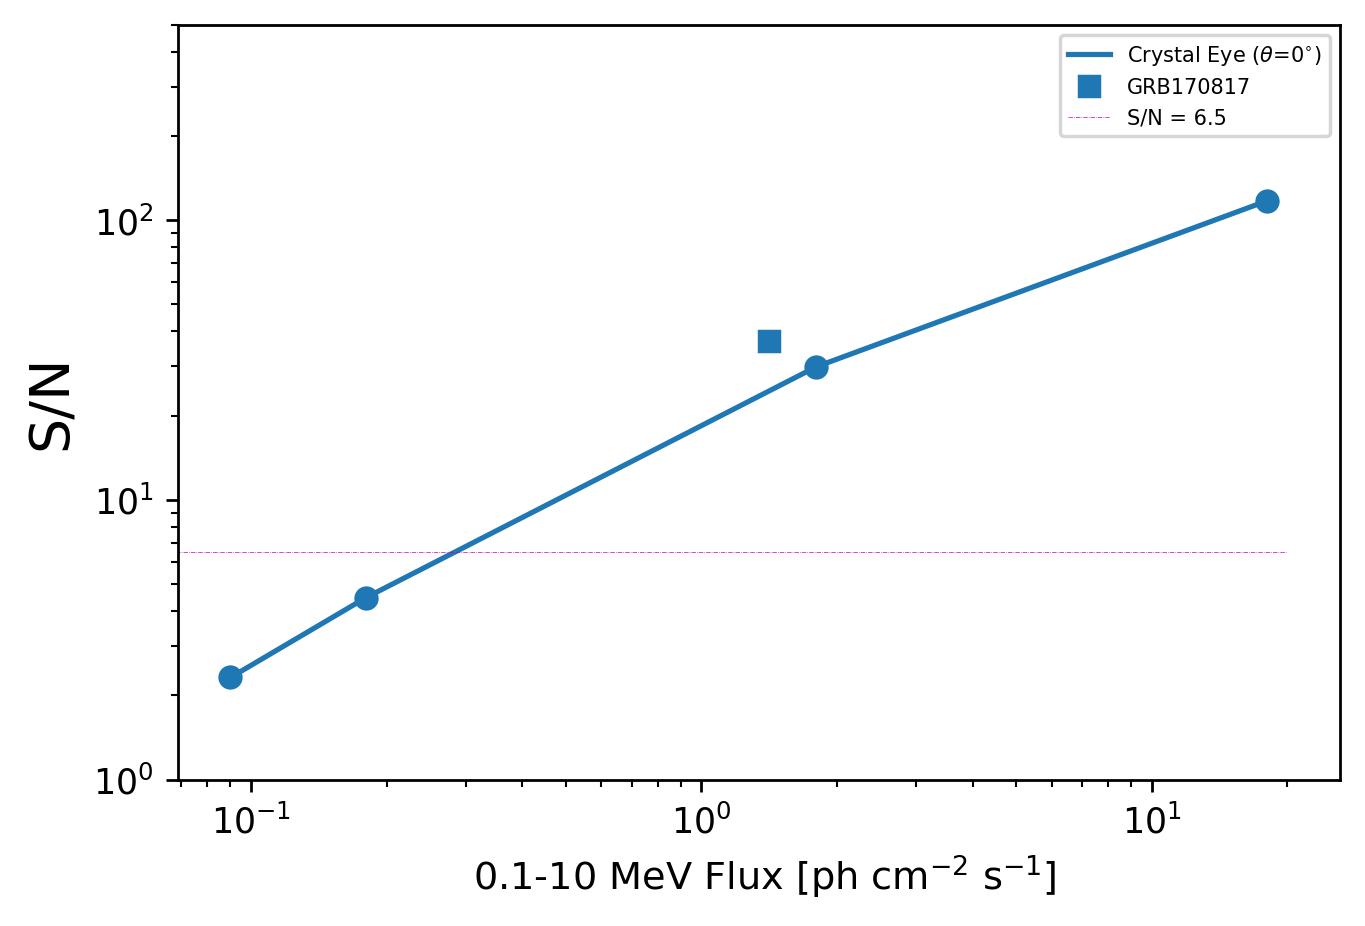

In [22]:
from scipy.interpolate import interp1d
#SN for generic GRB
def SN(A_norm,back_rate_in,Aeff):

    #First calculate integral of GRB model with current A_norm
    Tobs=1
    alpha = -0.37
    Epeak = 636
    def GRB(x):
         return A_norm*(x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
        
    FLUX=quad(GRB, 100, 1000)[0]
      
    #Build function with GRB convolved with A_eff and Tobs

    def fat(x):
        return GRB(x)*Aeff(x)*Tobs
    
    
    #Now let's solve integral eq. First calculate integral between 10 keV and 10 MeV

    fat_int = quad(fat, 10, 10000)
    fat_int = fat_int[0]
    
    #Calculate S/N
    
    sn= fat_int/sqrt(fat_int+back_rate_in*Tobs)
    
    
    return(FLUX,sn)

print(SN(1.48e-2,back_rate,Aeff_interp))


energies=[5e-4,1e-3,1e-2,1e-1]

flux_plot=[]

sn_plot=[]

for ener in energies:
    flux_plot.append(SN(ener,back_rate,Aeff_interp)[0])  
    sn_plot.append(SN(ener,back_rate,Aeff_interp)[1])


flux_interpolated=np.linspace(min(flux_plot), max(flux_plot),500)
f = interp1d(flux_plot, sn_plot, kind='quadratic')
print(f(0.27))
sn_smooth=f(flux_interpolated)


plt.xscale('log')
plt.yscale('log')
plt.ylim([1e0, 5e2])

plt.xlabel(' 0.1-10 MeV Flux [ph cm$^{-2}$ s$^{-1}$]',fontsize=11)
plt.ylabel('S/N',fontsize=16)
#plt.plot(flux_interpolated,sn_smooth,label="Zire")

plt.plot(flux_plot,sn_plot,label=r"Crystal Eye ($\theta$=0$^{\circ}$)")
plt.scatter(flux_plot,sn_plot)
plt.plot(1.41,37,'s', label='GRB170817',color='C0')

plt.hlines(6.5, 0,20,linewidth=0.2,linestyle='-.',color='m',label='S/N = 6.5')


plt.legend(fontsize=6)
plt.savefig('signal_noise_VS_flux')

In [14]:
#Get normalization factor for GRB17

def GRB_pre(x):
         alpha = -0.85
         Epeak = 229
         return x*(x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model

int_GRB_17=quad(GRB_pre,10,1000)
A_norm_17=455.6/int_GRB_17[0]

print(A_norm_17)

#SN for GRB170817
def SN_17(A_norm):

    #First calculate integral of GRB model with current A_norm
    Tobs=1
    alpha = -0.85
    Epeak = 229
    def GRB_17(x):
         return A_norm*(x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
        
    FLUX=quad(GRB_17, 100, 1000)[0]
      
    #Build function with GRB convolved with A_eff and Tobs

    def fat_17(x):
        return GRB_17(x)*Aeff_interp(x)*Tobs
    
    
    #Now let's solve integral eq. First calculate integral between 10 keV and 10 MeV

    fat_int = quad(fat_17, 10, 10000)
    fat_int = fat_int[0]
    
    #Calculate S/N
    
    sn= fat_int/sqrt(fat_int+back_rate*Tobs)
    
    
    return(FLUX,sn)

print(SN_17(A_norm_17))

0.022995734336092272
(1.4100403821966068, 37.0083809661268)


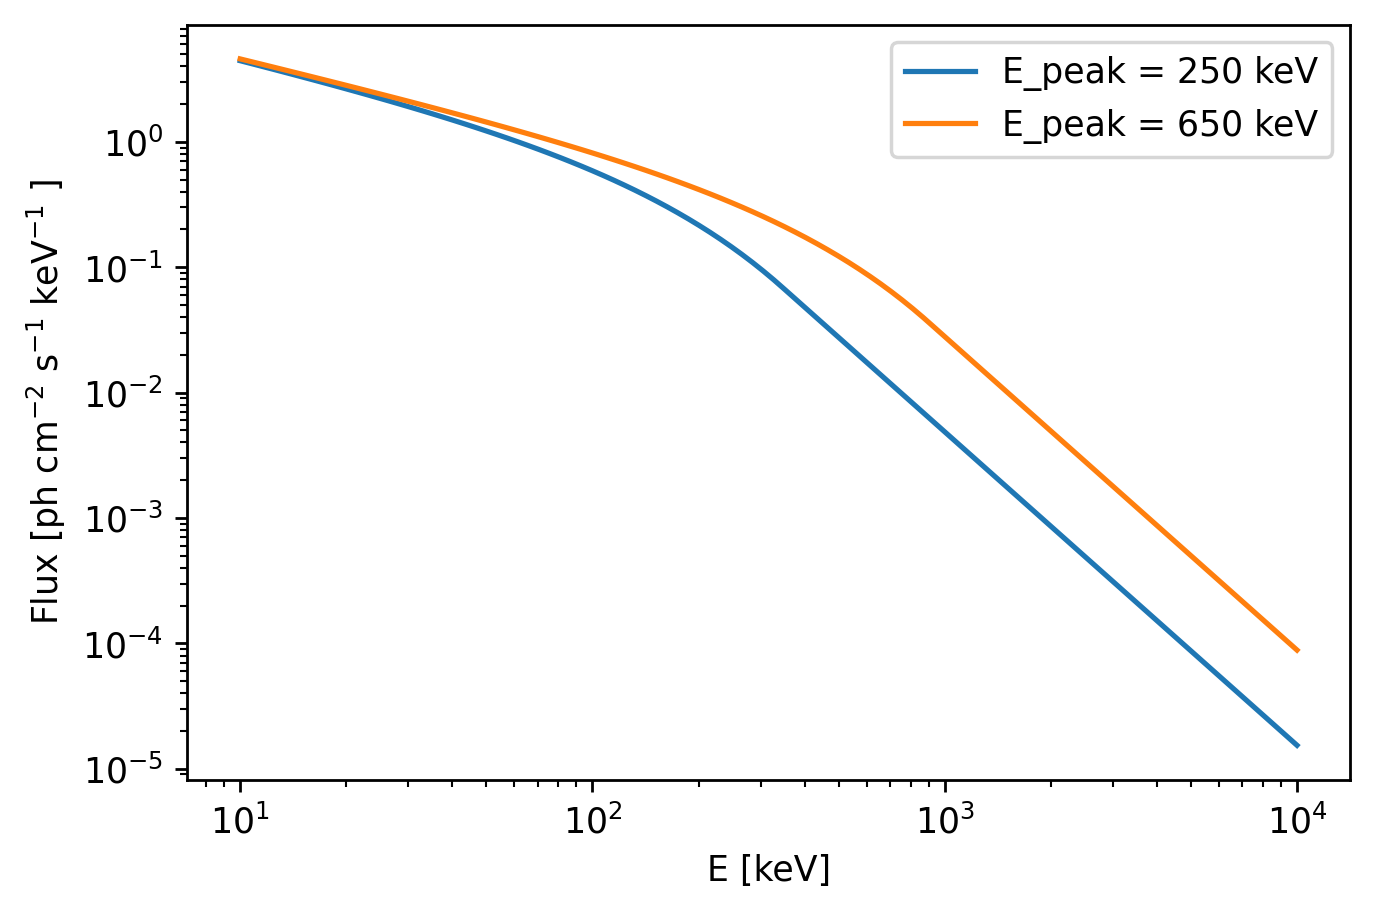

In [4]:
#PLOT the BAND model

#Parameters for Band model
alpha = -0.67
beta  = -2.5
#Epeak = 230 #keV
#threshold = (alpha-beta)*Epeak/(alpha+2);

def GRB(x,Epeak):
     #return (x/100)**(alpha)*np.exp(-(alpha+2)*x/Epeak) #Comptonized model
     threshold = (alpha-beta)*Epeak/(alpha+2);

     if( x<threshold ):
         return (( x/100.)**(alpha) * np.exp( -(alpha+2)*x/Epeak ))
     elif( x>=threshold ):
         return (( x/100.)**(beta) * np.exp(beta-alpha) * ((alpha-beta)*Epeak/(100*(alpha+2)))**(alpha-beta))
v_GRB=np.vectorize(GRB)
  
energy_band=np.logspace(1,4,100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [keV]')
plt.ylabel(r'Flux [ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$ ]')
plt.plot(energy_band,v_GRB(energy_band,250), label='E_peak = 250 keV')
plt.plot(energy_band,v_GRB(energy_band,650), label='E_peak = 650 keV')
plt.legend()
plt.show()